In [119]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt

In [87]:
vdod = pd.read_csv('data/VehicleDiagnosticOnboardData.csv')

In [88]:
vdod

,Id,Name,Value,FaultId
0,1,IgnStatus,False,1
1,2,EngineOilPressure,0,1
2,3,EngineOilTemperature,96.74375,1
3,4,TurboBoostPressure,0,1
4,5,EngineLoad,11,1
...,...,...,...,...
12821621,12864020,EngineCoolantTemperature,181.4,1248457
12821622,12864021,ParkingBrake,False,1248457
12821623,12864022,SwitchedBatteryVoltage,14.1,1248457
12821624,12864023,DistanceLtd,28606.65625,1248457


In [89]:
vdod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12821626 entries, 0 to 12821625
Data columns (total 4 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   Id       int64 
 1   Name     object
 2   Value    object
 3   FaultId  int64 
dtypes: int64(2), object(2)
memory usage: 391.3+ MB


In [90]:
#filter dout all Equipment ID's greatter than

In [91]:
jfaults = pd.read_csv('data/J1939Faults.csv', dtype={'EquipmentID': str})

In [92]:
#renamed equipmentID to Id for the merge 
jfaults.rename(columns={'EquipmentID': 'Id'}, inplace=True)

In [93]:
jfaults['EventTimeStamp'] = pd.to_datetime(jfaults['EventTimeStamp'])

In [94]:
jfaults.drop(['actionDescription', 'faultValue'],
             axis = 1,
             inplace = True)

In [95]:
jfaults['Id'] = jfaults['Id'].map(lambda x: x.lstrip('R').rstrip('aAbBcC'))

In [96]:
jfaults['Id'] = pd.to_numeric(jfaults['Id'])

In [97]:
jfaults[jfaults['Id'] <= 9999]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,Id,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,990349,2015-02-21 10:47:13,Low (Severity Low) Engine Coolant Level,unknown,unknown,unknown,unknown,0,111,17,True,2,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,990360,2015-02-21 11:34:34,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,990364,2015-02-21 11:35:31,Incorrect Data Steering Wheel Angle,unknown,unknown,unknown,unknown,11,1807,2,False,127,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,990370,2015-02-21 11:35:33,Incorrect Data Steering Wheel Angle,unknown,unknown,unknown,unknown,11,1807,2,True,127,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,990416,2015-02-21 11:39:41,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187330,1248454,123904424,2020-03-06 14:00:26,Low (Severity Low) Catalyst Tank Level,04384413*22383729*082218154102*60701732*G1*BGT*,80156139,6X1u17D1500000000,CMMNS,0,1761,17,False,3,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000
1187331,1248455,123905139,2020-03-06 14:04:23,Condition Exists Engine Protection Torque Derate,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,1569,31,True,5,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000
1187332,1248456,123905996,2020-03-06 14:13:38,Abnormal Rate of Change Aftertreatment 1 Intak...,05317106*05100987*050719120655*09401585*G1*BDR*,79880653,6X1u13D1500000000,CMMNS,0,3216,10,True,1,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000
1187333,1248457,123906113,2020-03-06 14:14:13,Low (Severity Medium) Engine Coolant Level,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,8,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000


In [98]:
jfaults[jfaults['Id']]

KeyError: "None of [Int64Index([1439, 1439, 1369, 1369, 1674, 1417, 1597, 1429, 1429, 1417,\n            ...\n            2255, 1936, 1936, 1886, 1886, 2282, 1994, 1850, 2377, 2377],\n           dtype='int64', length=1187335)] are in the [columns]"

In [ ]:
#spns of interest
spns = [5246, 5394, 5392, 4094]
#jfault_abridged = jfaults[jfaults['spn'] == 5246 & ((jfaults['spn'] == 5394) 
                  #| (jfaults['spn'] == 5392) | (jfaults['spn'] == 4094 ))]
jfault_abridged = jfaults[jfaults['spn'].isin(spns)]


In [ ]:
jfault_abridged

In [ ]:
jfault_pivot = pd.pivot_table(jfault_abridged, 'spn', 'EventTimeStamp', 'Id')

In [ ]:
#jfaults[(jfaults['Latitude'] > 36.0833667 |  < 36.0499667) & (jfaults['Longitude'] < -86.4180222 | > -86.4514222)]

In [109]:
jfaults['time_next_5246'] = jfaults.loc[jfaults.spn==5246, 'EventTimeStamp']
jfaults['time_next_5246'] = jfaults.groupby('EquipmentID')['time_next_5246'].bfill()
jfaults

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,Id,MCTNumber,Latitude,Longitude,LocationTimeStamp,time_next_5246
0,1,990349,2015-02-21 10:47:13,Low (Severity Low) Engine Coolant Level,unknown,unknown,unknown,unknown,0,111,17,True,2,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,NaT
1,2,990360,2015-02-21 11:34:34,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000,NaT
2,3,990364,2015-02-21 11:35:31,Incorrect Data Steering Wheel Angle,unknown,unknown,unknown,unknown,11,1807,2,False,127,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000,NaT
3,4,990370,2015-02-21 11:35:33,Incorrect Data Steering Wheel Angle,unknown,unknown,unknown,unknown,11,1807,2,True,127,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000,NaT
4,5,990416,2015-02-21 11:39:41,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187330,1248454,123904424,2020-03-06 14:00:26,Low (Severity Low) Catalyst Tank Level,04384413*22383729*082218154102*60701732*G1*BGT*,80156139,6X1u17D1500000000,CMMNS,0,1761,17,False,3,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000,NaT
1187331,1248455,123905139,2020-03-06 14:04:23,Condition Exists Engine Protection Torque Derate,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,1569,31,True,5,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000,NaT
1187332,1248456,123905996,2020-03-06 14:13:38,Abnormal Rate of Change Aftertreatment 1 Intak...,05317106*05100987*050719120655*09401585*G1*BDR*,79880653,6X1u13D1500000000,CMMNS,0,3216,10,True,1,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000,NaT
1187333,1248457,123906113,2020-03-06 14:14:13,Low (Severity Medium) Engine Coolant Level,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,8,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000,NaT


In [126]:
jfaults['difference_firstspn_5246'] = jfaults['difference_firstspn_5246'].dt.total_seconds()

In [118]:
jfaults['difference_firstspn_5246'] = jfaults['EventTimeStamp'] - jfaults['time_next_5246']
#fancy code keeps only rows without Nas. Something to remember!!!
jfaults_NoNa = jfaults[~jfaults['difference_firstspn_5246'].isnull()]
3jfaults_NoNa

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,...,active,activeTransitionCount,Id,MCTNumber,Latitude,Longitude,LocationTimeStamp,time_next_5246,spncode_to_5246,difference_firstspn_5246
5,6,990431,2015-02-21 11:40:22,Low (Severity Low) Engine Coolant Level,04993120*00025921*082113134117*07700053*I0*BBZ*,79466580,6X1u10D1500000000,CMMNS,0,111,...,True,1,1417,105438630,33.043564,-96.179722,2015-02-21 11:40:59.000,2015-07-21 11:06:35,-150 days +00:33:47,-150 days +00:33:47
9,10,990446,2015-02-21 11:41:55,Low (Severity Low) Engine Coolant Level,04993120*00025921*082113134117*07700053*I0*BBZ*,79466580,6X1u10D1500000000,CMMNS,0,111,...,False,1,1417,105438630,33.039953,-96.182592,2015-02-21 11:41:51.000,2015-07-21 11:06:35,-150 days +00:35:20,-150 days +00:35:20
10,11,990459,2015-02-21 11:42:19,Low (Severity Low) Engine Coolant Level,04993120*00184697*060712145341*07700027*I0*BBZ*,79618845,6X1u10D1500000000,CMMNS,0,111,...,True,1,1582,105410980,40.158055,-80.151018,2015-02-21 11:42:55.000,2016-02-17 07:43:34,-361 days +03:58:45,-361 days +03:58:45
13,14,990470,2015-02-21 11:43:40,Low (Severity Low) Engine Coolant Level,04993120*00184697*060712145341*07700027*I0*BBZ*,79618845,6X1u10D1500000000,CMMNS,0,111,...,False,1,1582,105410980,40.161944,-80.161018,2015-02-21 11:43:36.000,2016-02-17 07:43:34,-361 days +04:00:06,-361 days +04:00:06
15,16,990495,2015-02-21 11:45:06,Low (Severity Low) Engine Coolant Level,04993120*00190002*082113134117*07700053*I0*BBZ*,79623056,6X1u10D1500000000,CMMNS,0,111,...,False,1,1601,105430420,38.272037,-78.937129,2015-02-21 11:45:02.000,2016-04-24 14:07:08,-429 days +21:37:58,-429 days +21:37:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184338,1245462,122308657,2020-02-24 15:54:22,Low Voltage (Battery Potential / Power Input 1),AAAI000051*AAAM010056*Z091290 *A82J170202A_b...,6228183675,EC80ESP,BNDWS,11,168,...,True,1,2211,105329862,36.066712,-86.434629,2020-02-24 15:37:17.000,2020-02-27 12:11:33,-3 days +03:42:49,-3 days +03:42:49
1185192,1246316,122700678,2020-02-27 08:41:12,Abnormal Frequency J1939 Network #2,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1231,...,True,4,2211,105329862,36.066296,-86.434490,2020-02-27 08:41:48.000,2020-02-27 12:11:33,-1 days +20:29:39,-1 days +20:29:39
1185193,1246317,122700679,2020-02-27 08:41:12,Abnormal Update Rate Headway Controller Forwar...,NaN,NaN,CECU3B-NAMUX4,PACCR,49,886,...,True,3,2211,105329862,36.066296,-86.434490,2020-02-27 08:41:48.000,2020-02-27 12:11:33,-1 days +20:29:39,-1 days +20:29:39
1185208,1246332,122706890,2020-02-27 08:42:47,Low (Severity High) Battery Potential / Power ...,5516010*202.21.0*5516502*E003.e003*5539401*25....,Z0017655,EEO-xxF112C,EATON,3,168,...,True,1,2211,105329862,36.066342,-86.434537,2020-02-27 08:43:07.000,2020-02-27 12:11:33,-1 days +20:31:14,-1 days +20:31:14


TypeError: The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[timedelta64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

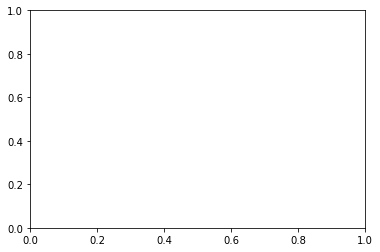

In [122]:
#plot distribution without log transformation
plt.hist(jfaults_NoNa['difference_firstspn_5246'])

In [111]:
jfaults.loc[:, 'time_next_5246'].notna().value_counts()

False    897999
True     289336
Name: time_next_5246, dtype: int64

In [64]:
Long = [-86.4347222, -86.4438888, -83.174722]
Lat = [36.0666667, 35.5883333, 36.1950]
dist = 0.0167

for i, j in zip(Lat, Long): 
    jfaults = jfaults[((jfaults['Latitude'] > i + dist) | (jfaults['Latitude']  < i - dist)) 
        & ((jfaults['Longitude'] < j - dist) | (jfaults['Longitude'] > j + dist))]

In [124]:
jfaults['Id'].nunique()

1059

In [124]:
-86.4347222 - 0.0167

-86.4514222

In [30]:
sfc = pd.read_excel('data/Service_Fault_Codes_1_0_0_167.xlsx')

C:\Users\bng19\anaconda3_64bit\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [31]:
sfc.head()

,Published in CES 14602,Cummins Fault Code,Revision,PID,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
0,Y,111,167,Not Mapped,254,0,12,629,12,P0606,Red,Stop / Shutdown,Engine Control Module Critical Internal Failur...,Error internal to the ECM related to memory ha...
1,Y,112,167,Not Mapped,20,128,7,635,7,Not Mapped,Red,Stop / Shutdown,Engine Timing Actuator Driver Circuit - Mechan...,Mechanical failure in the engine timing actuat...
2,Y,113,167,Not Mapped,20,128,3,635,3,Not Mapped,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...,High signal voltage detected at the engine tim...
3,Y,114,167,Not Mapped,20,128,4,635,4,Not Mapped,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...,Low voltage detected at the engine timing actu...
4,Y,115,167,190,Not Mapped,Not Mapped,2,612,2,P0008,Red,Stop / Shutdown,Engine Magnetic Speed/Position Lost Both of Tw...,The ECM has detected that the primary and back...


In [70]:
sfc[sfc['SPN'] == 5246]

,Published in CES 14602,Cummins Fault Code,Revision,PID,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
2518,Y,3712,167,Not Mapped,Not Mapped,Not Mapped,0,5246,0,Not Mapped,Red,Stop / Shutdown,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement of 5 mph derate - Fault Code 41...
2781,Y,4134,167,Not Mapped,Not Mapped,Not Mapped,0,5246,15,Not Mapped,Amber,Warning,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement - Least Severe - Fault Code 371...
4338,Y,6254,167,Not Mapped,Not Mapped,Not Mapped,0,5246,16,Not Mapped,Amber,Warning,Aftertreatment SCR Operator Inducement Severit...,NaN


In [98]:
joined_jf_vdod = jfaults.merge(vdod, on = 'Id', how='inner')

In [99]:
joined_jf_vdod

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,...,active,activeTransitionCount,Id,MCTNumber,Latitude,Longitude,LocationTimeStamp,Name,Value,FaultId
0,2090,1011009,2015-02-23 05:05:44.000,NaN,05290170*03015749*051914190353*09400015*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,5246,...,True,1,1630,105329900,40.733009,-74.087777,2015-02-23 05:08:23.000,LampStatus,1023,180
1,884718,28328550,2017-10-04 05:56:17.000,NaN,05290170*03015749*020516150530*09400053*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,5246,...,True,1,1630,105407611,37.839675,-80.753611,2017-10-04 05:56:52.000,LampStatus,1023,180
2,884884,28351338,2017-10-04 09:30:37.000,NaN,05290170*03015749*020516150530*09400053*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,5246,...,False,1,1630,105407611,37.839444,-80.754861,2017-10-04 09:30:32.000,LampStatus,1023,180
3,2972,1026305,2015-02-23 15:54:22.000,NaN,unknown,unknown,unknown,unknown,0,5246,...,True,1,1487,105369355,28.077361,-81.897083,2015-02-23 15:54:58.000,EngineOilPressure,27.84,170
4,5714,1070646,2015-02-25 13:53:08.000,NaN,unknown,unknown,unknown,unknown,0,5246,...,True,1,1329,105400037,39.399583,-82.974768,2015-02-25 13:56:31.000,SwitchedBatteryVoltage,3276.75,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,1237841,119019219,2011-01-01 00:03:23.000,NaN,04384413*22115617*090617144354*60701715*G1*BGT*,80035307,6X1u17D1500000000,CMMNS,0,5246,...,True,1,2175,105465629,33.259027,-84.096666,2020-01-28 05:15:35.000,EngineCoolantTemperature,176,239
913,1239555,119959276,2020-02-06 07:45:08.000,NaN,04358814*06005963*051718174436*09401683*G1*BDR*,79897320,6X1u13D1500000000,CMMNS,0,5246,...,True,1,1854,105385876,35.943611,-83.823009,2020-02-06 07:45:44.000,IgnStatus,True,208
914,1239564,119961467,2020-02-06 08:03:09.000,NaN,04358814*06005963*051718174436*09401683*G1*BDR*,79897320,6X1u13D1500000000,CMMNS,0,5246,...,False,1,1854,105385876,35.943472,-83.823240,2020-02-06 08:03:05.000,IgnStatus,True,208
915,1241841,120905759,2020-02-13 13:32:39.000,NaN,04358814*06026985*051718174436*09401683*G1*BDR*,79903054,6X1u13D1500000000,CMMNS,0,5246,...,True,1,1872,105301976,35.707268,-81.397037,2020-02-13 13:33:15.000,ParkingBrake,False,208


In [104]:
joined_jf_vdod.FaultId.value_counts()

172    152
171    105
202     50
163     45
173     44
191     40
170     37
174     36
33      29
175     25
213     24
188     22
195     20
158     20
242     20
208     19
159     17
162     16
197     16
207     15
166     14
183     14
212     14
189     12
156     12
235      9
184      8
215      8
209      8
198      8
218      6
31       6
180      6
220      4
231      4
229      4
227      4
210      3
205      2
239      2
154      2
192      2
204      2
161      2
186      2
32       2
201      2
214      1
230      1
155      1
Name: FaultId, dtype: int64